In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb
from IPython.display import Video

obb.user.preferences.output_type = "dataframe"

In [57]:
# Maturities - The length of time until a bond's principal is repaid
maturities = ["3m", "6m", "1y", "2y", "3y", "5y", "7y", "10y", "30y"]
data = obb.fixedincome.government.treasury_rates(
    start_date="1985-01-01",
    provider="federal_reserve",
).dropna(how="all").drop(columns=["month_1", "year_20"])
data.columns = maturities

In [83]:
# Add data verfication
print(f"Data shape: {data.shape}")
print("First few rows of data:")
print(data.head())

Data shape: (10056, 10)
First few rows of data:
                3m      6m      1y      2y      3y      5y      7y     10y  \
date                                                                         
1985-01-02  0.0810  0.0862  0.0919  0.1003  0.1061  0.1122  0.1168  0.1170   
1985-01-03  0.0807  0.0862  0.0917  0.1006  0.1055  0.1113  0.1154  0.1162   
1985-01-04  0.0808  0.0861  0.0917  0.1008  0.1062  0.1119  0.1161  0.1167   
1985-01-07  0.0806  0.0851  0.0903  0.1001  0.1050  0.1109  0.1141  0.1150   
1985-01-08  0.0806  0.0848  0.0904  0.0999  0.1048  0.1104  0.1136  0.1145   

               30y  inverted  
date                          
1985-01-02  0.1169     False  
1985-01-03  0.1164     False  
1985-01-04  0.1170     False  
1985-01-07  0.1153     False  
1985-01-08  0.1149     False  


In [59]:
# Mark where the yield curve is inverted
data["inverted"] = data["30y"] < data["3m"]

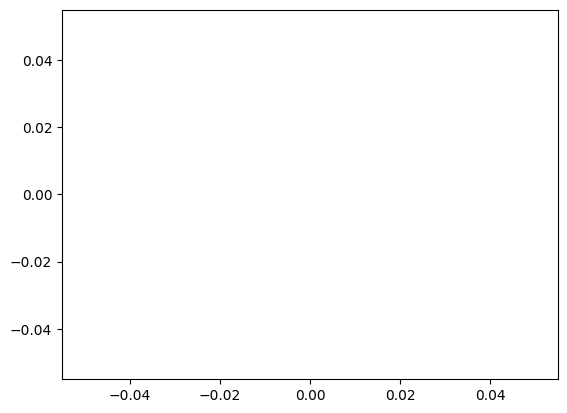

In [61]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot([], [])

In [63]:
# Set the range of ticks
ax.set_xlim(0, 8)
ax.set_ylim(0, 20)

(0.0, 20.0)

In [65]:
# Pick the tick locations
ax.set_xticks(range(9))
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])

In [67]:
# set axis labels
ax.set_xticklabels(maturities)
ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18])

[Text(0, 2, '2'),
 Text(0, 4, '4'),
 Text(0, 6, '6'),
 Text(0, 8, '8'),
 Text(0, 10, '10'),
 Text(0, 12, '12'),
 Text(0, 14, '14'),
 Text(0, 16, '16'),
 Text(0, 18, '18')]

In [69]:
# Force the y-axis labels to the left
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()

Text(0.5, 1.0, 'U.S Treasury Bond Yield Curve')

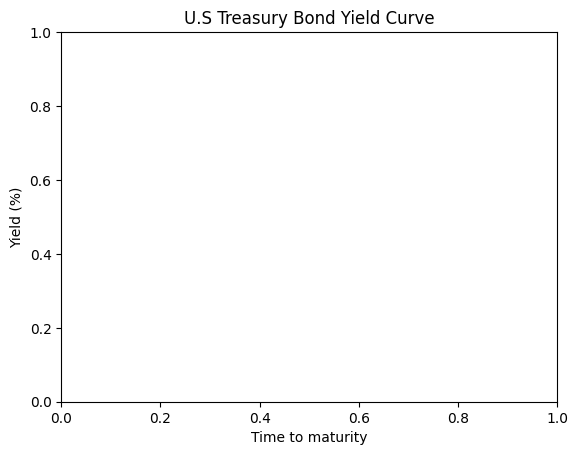

In [71]:
# Creating the axis labels
plt.ylabel("Yield (%)")
plt.xlabel("Time to maturity")
plt.title("U.S Treasury Bond Yield Curve")

In [73]:
# Function for when the animation is initialized
def init_func():
    line.set_data([], [])
    return (line,)

In [75]:
# Function that runs at each iteration through the data to animate the data
def animate(i):
    x = range(0, len(maturities))
    y = data[maturities].iloc[i]
    dt_ = data.index[i].strftime("%Y-%m-%d")
    if data.inverted.iloc[i]:
        line.set_color("r")
    else:
        line.set_color("y")
    line.set_data(x, y)
    plt.title(f"U.S. Treasury Bond Yield Curve ({dt_})")
    return (line,)

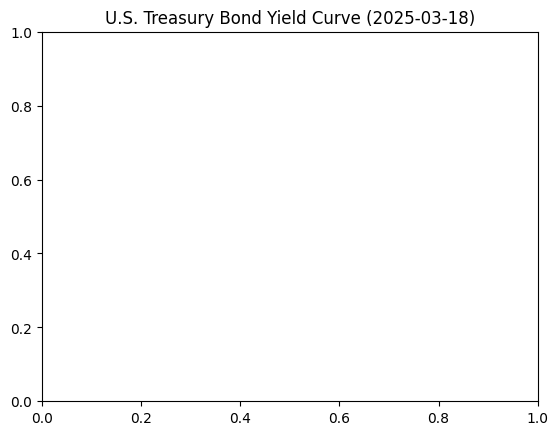

In [77]:
# Generate the animation using the function, the figure, and the function to initialize the ani
ani = animation.FuncAnimation(
    fig,
    animate,
    init_func=init_func,
    frames=len(data.index),
    interval=250,
    blit=True
)

# Save the animation to a file
output_file = 'yield_curve_animation.mp4'
ani.save(output_file, writer='ffmpeg', dpi=100)

In [78]:
#Display the saved video
Video(output_file)